<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/EDA_Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 探索性資料分析 (EDA) 簡介
探索性資料分析（Exploratory Data Analysis, EDA）是一種初步分析資料的過程，目的是理解資料的基本特徵、結構、關係和分佈情況。EDA通常通過可視化圖表和統計摘要來幫助分析師發現資料中的模式、異常值和關鍵變數，為後續的資料建模和決策提供基礎。


## 為什麼需要進行EDA？
1. **理解資料**：熟悉資料的各種屬性及其分佈情況。
2. **發現異常**：識別資料中的異常值和錯誤。
3. **發現模式**：識別資料中的趨勢、相關性和重要變數。
4. **數據清理**：決定如何處理缺失值和異常值。
5. **指導模型構建**：選擇合適的特徵和模型。


## EDA的基本步驟
1. **數據讀取與基本檢視**
    - 讀取數據集
    - 檢視數據結構、類型和簡單統計量
2. **數據清理**
    - 處理缺失值
    - 處理異常值
    - 數據轉換
3. **數據可視化**
    - 單變數分析（直方圖、箱形圖等）
    - 雙變數分析（散佈圖、相關矩陣等）
    - 多變數分析（熱力圖、對角線圖等）
4. **特徵工程**
    - 創建新特徵
    - 特徵選擇與降維


## EDA案例：鐵達尼號生存分析
在這個案例中，我們將對鐵達尼號的乘客數據進行探索性資料分析。通過這個分析，我們將逐步了解數據的基本特徵、發現數據中的重要趨勢和異常情況，並為後續的分析和模型建構提供基礎。


In [2]:
!curl -o titanic.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60302  100 60302    0     0   631k      0 --:--:-- --:--:-- --:--:--  633k


In [ ]:
# 步驟一：數據讀取與基本檢視
import pandas as pd

# 讀取鐵達尼號數據
data = pd.read_csv('titanic.csv')

In [8]:
# 檢視數據結構
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  705 non-null    int64  
 1   Survived     705 non-null    int64  
 2   Pclass       705 non-null    int64  
 3   Name         705 non-null    object 
 4   Sex          705 non-null    object 
 5   Age          705 non-null    float64
 6   SibSp        705 non-null    int64  
 7   Parch        705 non-null    int64  
 8   Ticket       705 non-null    object 
 9   Fare         705 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     705 non-null    object 
 12  FamilySize   705 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 77.1+ KB


In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
# 步驟二：數據清理
# 處理缺失值和異常值
# 處理缺失值
data = data.dropna(subset=['Age', 'Embarked'])
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# 處理異常值（例如：移除票價為0或不合理的數據）
data = data[data['Fare'] > 0]

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  705 non-null    int64  
 1   Survived     705 non-null    int64  
 2   Pclass       705 non-null    int64  
 3   Name         705 non-null    object 
 4   Sex          705 non-null    object 
 5   Age          705 non-null    float64
 6   SibSp        705 non-null    int64  
 7   Parch        705 non-null    int64  
 8   Ticket       705 non-null    object 
 9   Fare         705 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     705 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.6+ KB
None


<ipython-input-4-cd4a96fe3670>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-4-cd4a96fe3670>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'].fillna(data['Fare'].median(), inplace=True)


In [12]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57\_C7ccp7hbgSz3\_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-05-18 14:20:03--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.138, 172.253.122.139, 172.253.122.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-18 14:20:03--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c21::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  35.1MB/s    in 0.6s    

2024-05-18 14

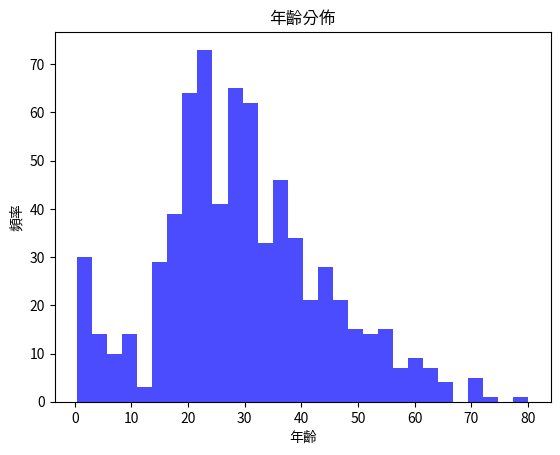

In [13]:
# 步驟三：數據可視化
import matplotlib.pyplot as plt
import seaborn as sns

# 直方圖：年齡分佈
plt.hist(data['Age'], bins=30, color='blue', alpha=0.7)
plt.title('年齡分佈')
plt.xlabel('年齡')
plt.ylabel('頻率')
plt.show()

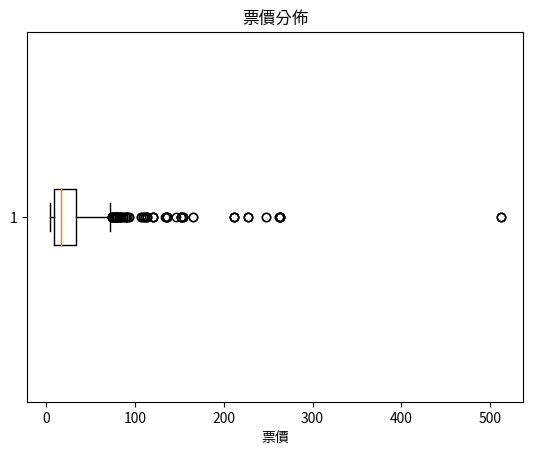

In [14]:
# 箱形圖：票價分佈
plt.boxplot(data['Fare'], vert=False)
plt.title('票價分佈')
plt.xlabel('票價')
plt.show()

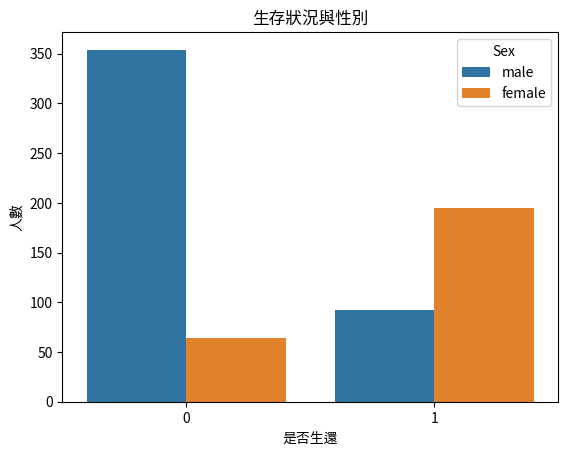

In [15]:
# 雙變數分析：生存狀況與性別
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('生存狀況與性別')
plt.xlabel('是否生還')
plt.ylabel('人數')
plt.show()

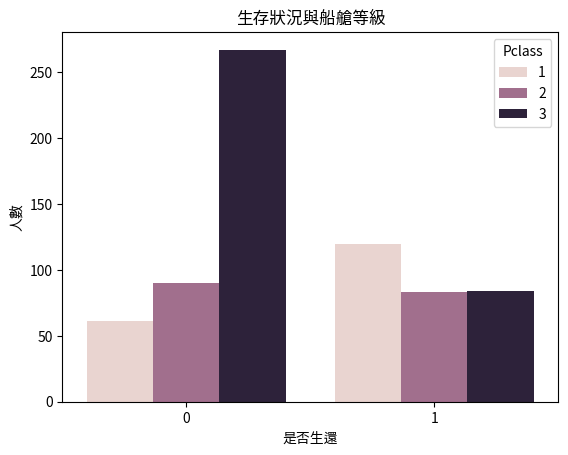

In [16]:
# 雙變數分析：生存狀況與船艙等級
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('生存狀況與船艙等級')
plt.xlabel('是否生還')
plt.ylabel('人數')
plt.show()

## 結論與後續工作
通過這個探索性資料分析，我們對鐵達尼號乘客數據有了初步的了解。接下來，我們將基於這些發現進行更深入的數據分析和建模工作，以便為預測乘客生存機率提供有力支持。


## 參考資料
- [Pandas 官方文件](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib 官方文件](https://matplotlib.org/stable/contents.html)
- [Seaborn 官方文件](https://seaborn.pydata.org/)
